/Users/yukiharuta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


All data, N = 63
Q2: 19.57, Q3-Q1: 7.53
Q2: 28.13, Q3-Q1: 14.05
Threshold: 0.3 mm/h
Slow: [0.109, 0.282], Fast: [0.319, 1.262]
csv saved
Figure saved


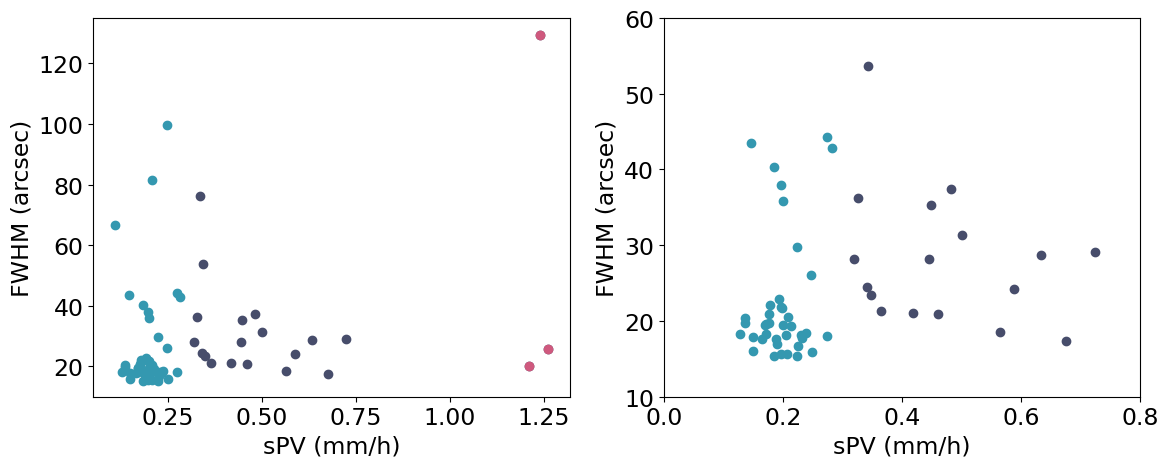

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import csv

save_option = True
filename = "../Data/Figure5/FWHM-analysis.csv"

# figure save option
fig_save_option = True
figsavepath = "../Figures/FigureS16_sPV-FWHM.svg"

path = "../Data/01_SUMMARY.xlsx"
df = pd.read_excel(path)

S = df['SV'].to_list()
X = df['PV'].to_list()
Y = df['FWHM'].to_list()
R = df['R2'].to_list()
L = df['L_end'].to_list()

# remove Failed experiment
# False_check = df['FALSE'].to_list()
# False_indices = [i for i, x in enumerate(False_check) if x == 1]
# for index in sorted(False_indices, reverse=True):
#     del S[index]
#     del X[index]
#     del Y[index]
#     del R[index]
#     del L[index]

# remove nan
nan_indices = [i for i, x in enumerate(X) if isinstance(x, float) and math.isnan(x)]
for index in sorted(nan_indices, reverse=True):
    del S[index]
    del X[index]
    del Y[index]
    del R[index]
    del L[index]

nan_indices = [i for i, x in enumerate(Y) if isinstance(x, float) and math.isnan(x)]
for index in sorted(nan_indices, reverse=True):
    del S[index]
    del X[index]
    del Y[index]
    del R[index]
    del L[index]
    
# remove fitfail
str_indices = [i for i, x in enumerate(Y) if not isinstance(x, float)]
for index in sorted(str_indices, reverse=True):
    del S[index]
    del X[index]
    del Y[index]
    del R[index]
    del L[index]
    
# remove bad fitting
R2_indices = [i for i, x in enumerate(R) if x < 0.91]
for index in sorted(R2_indices, reverse=True):
    del S[index]
    del X[index]
    del Y[index]
    del R[index]
    del L[index]

# remove too small crystals
L_indices = [i for i, x in enumerate(L) if x < 4]
for index in sorted(L_indices, reverse=True):
    del S[index]
    del X[index]
    del Y[index]
    del R[index]
    del L[index]
    
print(f'All data, N = {len(X)}')

threshold = 0.3
Y1, Y2 = [], []
R1, R2 = [], []
for x, y in zip(X,Y):
    if x < threshold:
        Y1.append(y)
        R1.append(x)
    else:
        Y2.append(y)
        R2.append(x)

# no FCG data
X_no, Y_no = [], []
for x, y in zip(R2,Y2):
    if x > 1:
        X_no.append(x)
        Y_no.append(y)
        
# All
plt.rcParams["font.size"] = 17
fig, axes = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(12,5))
color1 = "#474D6B" # dark blue
color2 = '#3498B0' # light blue
color3 = '#CF597E' # red

ax1 = axes[0]
ax1.scatter(R1,Y1,c=color2,label='good')
ax1.scatter(R2,Y2,c=color1,label='bad')
ax1.scatter(X_no,Y_no,c=color3,label='non FCG')
ax1.set_xlabel('sPV (mm/h)')
ax1.set_ylabel('FWHM (arcsec)')
ax1.set_ylim(10,135)

# Focused
ax2 = axes[1]
ax2.scatter(R1,Y1,c=color2,label='good')
ax2.scatter(R2,Y2,c=color1,label='bad')
ax2.set_ylim(10,60)
ax2.set_xlim(0,0.8)
ax2.set_xlabel('sPV (mm/h)')
ax2.set_ylabel('FWHM (arcsec)')

def print_statistics(lst):
    q_1 = np.percentile(lst, 25)
    q_2 = np.percentile(lst, 50)
    q_3 = np.percentile(lst, 75)
    print(f'Q2: {q_2:.2f}, Q3-Q1: {q_3-q_1:.2f}')

print_statistics(Y1)
print_statistics(Y2)
print(f'Threshold: {threshold} mm/h')

print(f'Slow: [{min(R1):.3f}, {max(R1):.3f}], Fast: [{min(R2):.3f}, {max(R2):.3f}]')
# Save csv
if save_option:
    with open(filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['PV', 'FWHM'])
        for i in range(len(X)):
            csvwriter.writerow([X[i], Y[i]])
    print('csv saved')
    
if fig_save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight', transparent=True)
    print('Figure saved')
plt.show()

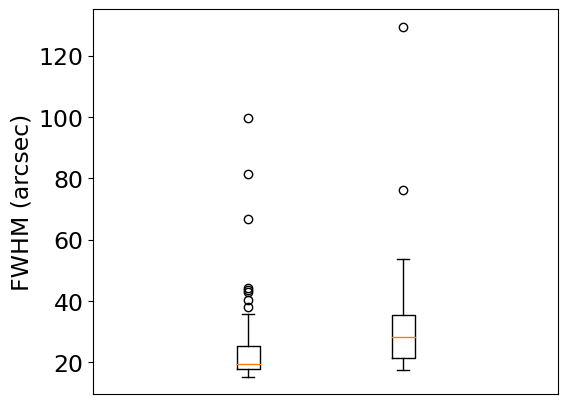

42 21


In [7]:
mean, width = 1.3, 0.15
X1 = np.random.uniform(mean-width, mean+width, len(Y1))
X1 -= np.mean(X1)
X1 += mean # mean value

mean, width = 2.3, 0.15
X2 = np.random.uniform(mean-width, mean+width, len(Y2))
X2 -= np.mean(X2)
X2 += mean # mean value

plt.rcParams["font.size"] = 17
fig = plt.figure(figsize=(6,5))
plt.boxplot([Y1,Y2])
# plt.scatter(X1,Y1,ec='blue',c='white')
# plt.scatter(X2,Y2,ec='orange',c='white')
plt.xticks([])
plt.xlim(0,3)
plt.ylabel('FWHM (arcsec)')
plt.show()
print(len(Y1),len(Y2))

In [18]:
threshold = 30
print(np.median(Y1))
print(np.median(Y2))

19.572329798204045
28.13026365274684


In [8]:
threshold = 20 # arcsec

def count_check(Y, threshold):
    success_cases = sum(1 for y in Y if y < threshold)
    success_rate = success_cases/len(Y)*100
    print(f'Success rate: {success_rate:.2f}% ({success_cases}/{len(Y)})')

count_check(Y1, threshold)
count_check(Y2, threshold)

Success rate: 57.14% (24/42)
Success rate: 9.52% (2/21)
